In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
file_path = "/home/hwang/SIB/visualization/example_log.csv"

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']]
y_names = ['a', 's', 'd', 'f']

col_names = x_names + y_names

df = pd.read_csv(file_path,names=col_names)

In [7]:
df = df.iloc[df.index[:340]]

In [23]:
a = df['L0x']
b = pd.DataFrame(a)
b.describe()

,L0x
count,340.000000
mean,0.719941
std,0.026315
min,0.254978
25%,0.718412
50%,0.722139
75%,0.726273
max,0.733586


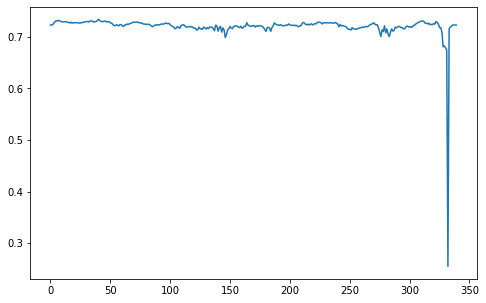

In [9]:
plt.figure(figsize=(8, 5))

plt.plot(b)
plt.show()

In [28]:
scaler = StandardScaler()
c = scaler.fit_transform(b)

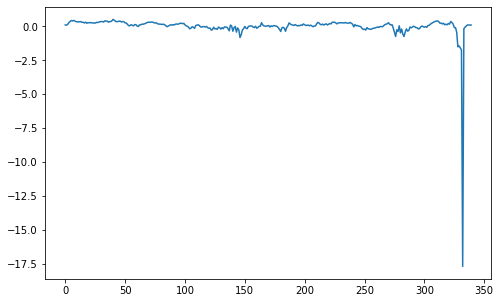

In [11]:
plt.figure(figsize=(8,5))
plt.plot(c)
plt.show()

In [12]:
stdm = df.std().mean()
stdm

0.037671903491707744

In [13]:
dff = df[x_names]-df[x_names].median()
dff = abs(dff)

In [14]:
n=0
dff = pd.DataFrame(dff).to_numpy()
new_df = df
# new_df = pd.DataFrame(df[x_names]).to_numpy()
# # type(new_df[0,0])
# print (dff.loc[[0],['L0x']]) 
for i in range(340):
    # print (dff.loc0],['L0x']]) 
    if (dff[i,0] > (stdm/2.0) ):  ## problems : how should i set stdm...
        new_df = new_df.drop(i)
        n = n+1
# print('changes number :',n)
new_a = new_df["L0x"]
df_new = pd.DataFrame(new_a)

In [15]:
df_new = df.iloc[df.index[:332]]

In [26]:
data = df_new['L0x']
f = pd.DataFrame(data)
f

,L0x
0,0.722763
1,0.722407
2,0.723790
3,0.727281
4,0.729255
...,...
327,0.708769
328,0.680382
329,0.681916
330,0.678478


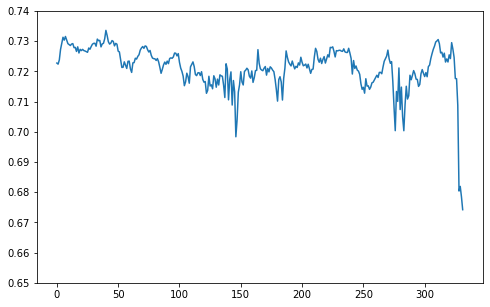

In [35]:
plt.figure(figsize=(8,5))
plt.ylim([0.65,0.74])
plt.plot(f)
plt.show()

In [17]:
MIN_BOUND = 0.674212
MAX_BOUND = 0.733586

def normalize(data):
    data = (data - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    data[data>1] = 1.
    data[data<0] = 0.
    return data

e = normalize(data)

In [18]:
e.describe()

count    332.000000
mean       0.793493
std        0.123779
min        0.000000
25%        0.744429
50%        0.807205
75%        0.877796
max        1.000000
Name: L0x, dtype: float64

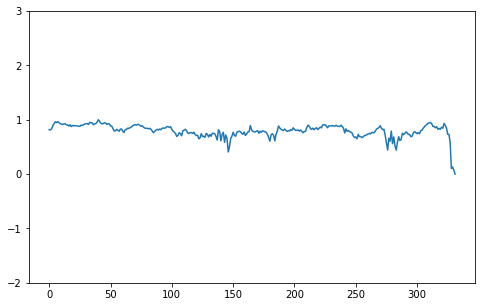

In [19]:
plt.figure(figsize=(8,5))
plt.ylim([-2,3])
plt.plot(e)
plt.show()